In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing dataset
df = pd.read_csv("C:/Users/sanju/Downloads/household_power_consumption.txt", sep = ';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
'''
About Houselhold power consumption Dataset:

1.date: Date in format dd/mm/yyyy
2.time: time in format hh:mm:ss
3.global_active_power: household global minute-averaged active power (in kilowatt)
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5.voltage: minute-averaged voltage (in volt)
6.global_intensity: household global minute-averaged current intensity (in ampere)
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

'''

In [ ]:
'''
For forecasting Household Energy Usage, the best target variable is global_active_power, 
as it represents the total household energy consumption in kilowatts.
'''

In [5]:
# Getting to know about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
'''
observations:
1. Date, Time are not in date format and time format datatypes
2.In the dataset expect date and time 2 of rows for remaining columns have ?
21/12/2006;11:23:00;?;?;?;?;?;?;
21/12/2006;11:24:00;?;?;?;?;?;?;
3. Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2 are not in correct data type format.
'''

In [6]:
#Convert 'Date' and 'Time' Columns to Datetime Format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert Date column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 142.5+ MB


In [8]:
# Drop the Time columns from dataset
df.drop(columns=['Time'], inplace=True)

In [9]:
# Find `?` in any column
print((df == "?").sum())  # Shows count of `?` in each column

Date                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64


In [10]:
# Replacing all these 25979 ? rows with Nan values
df.replace('?', np.nan, inplace=True)

In [11]:
# Converting all columns from Object to float data type
df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
    'Sub_metering_1', 'Sub_metering_2']] = df[['Global_active_power', 
    'Global_reactive_power', 'Voltage', 'Global_intensity', 
    'Sub_metering_1', 'Sub_metering_2']].astype(float)

In [12]:
# checking dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [13]:
# Getting to know NULL values
df.isnull().sum().any()

True

In [ ]:
# True means there are NULL values in dataset

In [14]:
# Getting to know column-wise NULL values
df.isnull().sum()

Date                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [15]:
# Dropping all rows that contain any null (NaN) values in any column
df.dropna(inplace=True)

In [16]:
# checking NULL values column-wise
df.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
# Plot daily average active power
daily_avg_power = df.groupby('Date')['Global_active_power'].mean().reset_index()
daily_avg_power

,Date,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658
...,...,...
1428,2010-11-22,1.417733
1429,2010-11-23,1.095511
1430,2010-11-24,1.247394
1431,2010-11-25,0.993864


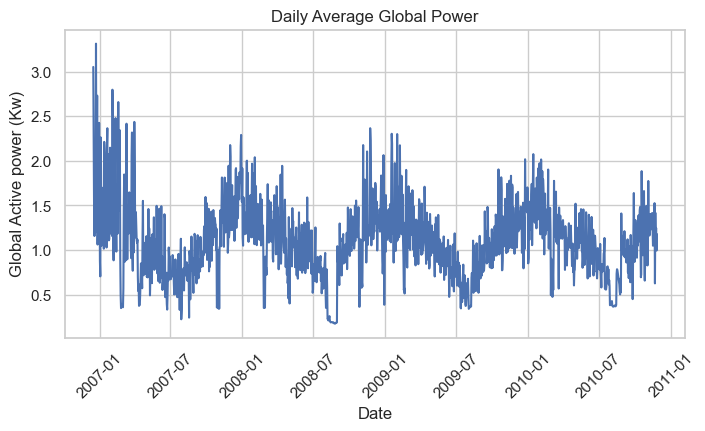

In [28]:
# Plot for Daily Average Global Active Power Trends
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))
sns.lineplot(x= daily_avg_power['Date'], y= daily_avg_power['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Global Active power (Kw)')
plt.title('Daily Average Global Power')
plt.xticks(rotation = 45)
plt.show()


In [29]:
# Drop the Date columns from dataset
df.drop(columns=['Date'], inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


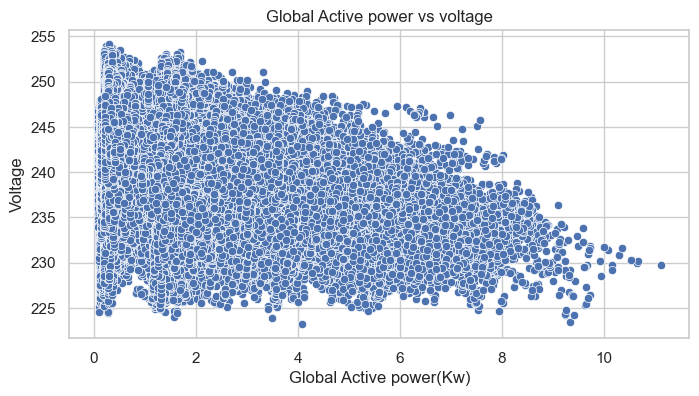

In [32]:
# scatter plot for global_active_power vs voltage
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'Global_active_power', y = 'Voltage', data = df)
plt.xlabel('Global Active power(Kw)')
plt.ylabel('Voltage')
plt.title('Global Active power vs voltage')
plt.show()

<Axes: >

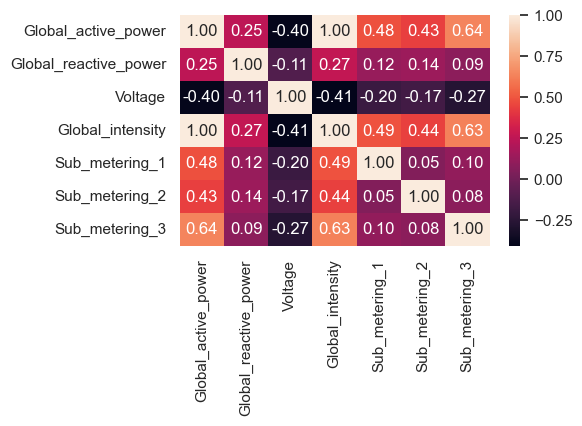

In [33]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(5,3))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

In [ ]:
'''
Pearson's Correlation Coefficient is in the range of [-1, 1] 
1 means perfect positive correlation, -1 is perfect negative correlation, 0 means no correlation

1 to 0.6 : strong positive correlation
0.2 to 0.6 : Moderate positive correlation
0 to 0.2: Weak positive correlation

-1 to -0.6 : Strong Negative Correlationship
-0.2 to -0.6 : Moderate Negative correlation
-0.2 to 0: Weak correlation(Uncorrelated)
'''

In [ ]:
'''
Gloabl active power is target variable 
1.sub metering 3 is having strong relationship w.r.t Target variable it is always going to stay in the model
2.sub metering 1, sub metering 2 are having moderate positive relationship with target variable
3.Voltage is having moderate negavtive relationship w.r.t Global active power

sub metering 3 is having strong relationship w.r.t Global Intensity, hence we will remove Global Intensity from our list
voltage is having weak relationship uncorrelated with w.r.t to sub metering 3 uncorrelated.

'''

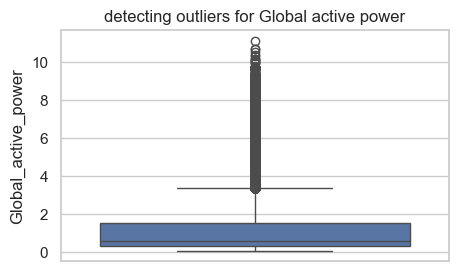

In [34]:
# checking if any outliers in Global active power column
plt.figure(figsize = (5,3))
sns.boxplot(df, y =df['Global_active_power'])
plt.title('detecting outliers for Global active power')
plt.show()

In [35]:
# Removing outliers
df = df[df['Global_active_power']<= 3.0]

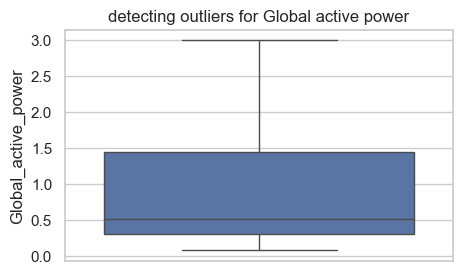

In [36]:
# checking again if any outliers Global active power column
plt.figure(figsize = (5,3))
sns.boxplot(df, y =df['Global_active_power'])
plt.title('detecting outliers for Global active power')
plt.show()

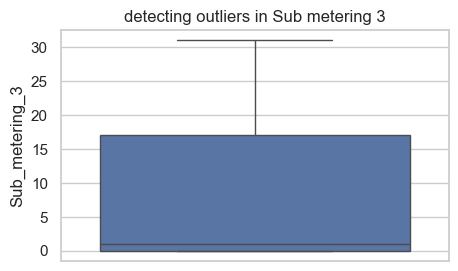

In [37]:
# Boxplot for Sub metering 3
plt.figure(figsize = (5,3))
sns.boxplot(df, y =df['Sub_metering_3'])
plt.title('detecting outliers in Sub metering 3')
plt.show()

In [38]:
# Check skewness for all relevant columns
skewness = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
               'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].skew()
print(skewness)

Global_active_power       0.873986
Global_reactive_power     1.185965
Voltage                  -0.282597
Global_intensity          0.896545
Sub_metering_1           12.675815
Sub_metering_2            9.890310
Sub_metering_3            0.869436
dtype: float64


In [ ]:
'''
Sub_metering_1, Sub_metering_2 are highly skewed columns
Columns Global_active_power, Global_reactive_power, Voltage, Global_intensity skeweness between -1 to 1
'''

In [39]:
# Building Linear Regression Model

X = df['Sub_metering_3'].to_numpy().reshape(-1,1)
y = df['Global_active_power']

# scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=5)

# Initalizing the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Taking the predictions from the model
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluating metrics
print('Training RMSE Score:', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),2))
print('Training R2 score:',np.round(r2_score(y_train, y_train_pred), 2))

print('\nTesting RMSE Score:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2))
print('Testing R2 score:',np.round(r2_score(y_test, y_test_pred), 2))

Training RMSE Score: 0.5
Training R2 score: 0.53

Testing RMSE Score: 0.5
Testing R2 score: 0.53


In [ ]:
# Conclusion: Linear Regression model R2 Score of both training and testing is underfitted model

In [40]:
# Split into features and target
x = df.drop(columns=['Global_active_power'])
y = df['Global_active_power'] 


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dictionary of regression models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=10, max_depth=3, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=3)
}
# Train and evaluate models
for name, model in models.items():
    
    model.fit(X_train, y_train)

    # Taking the Predictions from model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation metrics for training and testing
    train_rmse = np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 2)
    test_rmse = np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2)
    train_r2 = np.round(r2_score(y_train, y_train_pred), 2)
    test_r2 = np.round(r2_score(y_test, y_test_pred), 2)

    # Print results
    print(f"{name}:\n"
          f"  Training RMSE score: {train_rmse}\n"
          f"  Training R2 score: {train_r2}\n"
          f"  Testing RMSE score: {test_rmse}\n"
          f"  Testing R2 score: {test_r2}\n")


Random Forest:
  Training RMSE score: 0.1
  Training R2 score: 0.98
  Testing RMSE score: 0.1
  Testing R2 score: 0.98

Gradient Boosting:
  Training RMSE score: 0.26
  Training R2 score: 0.87
  Testing RMSE score: 0.26
  Testing R2 score: 0.87

